**Prediction using Supervised ML**

● Predict the percentage of an student based on the nunber of study hours.

In [ ]:
# Mounting with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing libraries
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from termcolor import colored
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# Importing the dataset
data = pandas.read_csv('/content/gdrive/My Drive/Datasets/GRIP datasets/Task- 1.csv', engine='python')
# Shape of dataset
data.shape

(25, 2)

In [ ]:
# Viewing first 3 rows from dataframe
data.head(3)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [ ]:
# Data cleaning
# Checking null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
# Checking duplicate values
data.duplicated().sum()

0

In [ ]:
# Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
# Description of dataframe
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


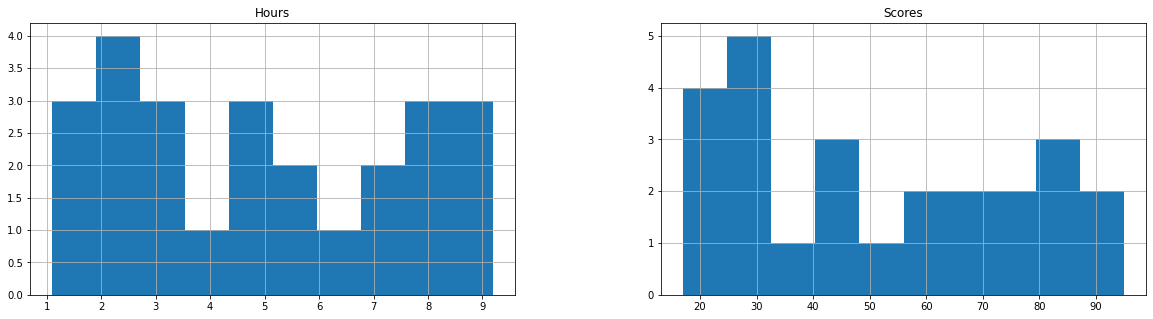

In [ ]:
# Histogram plot of dataframe
data.hist(figsize= (20, 5))
plt.show()

In [ ]:
# Number of unique vaules in both columns
data.nunique()

Hours     23
Scores    23
dtype: int64

In [ ]:
# Correlation matrix
correlation= data.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


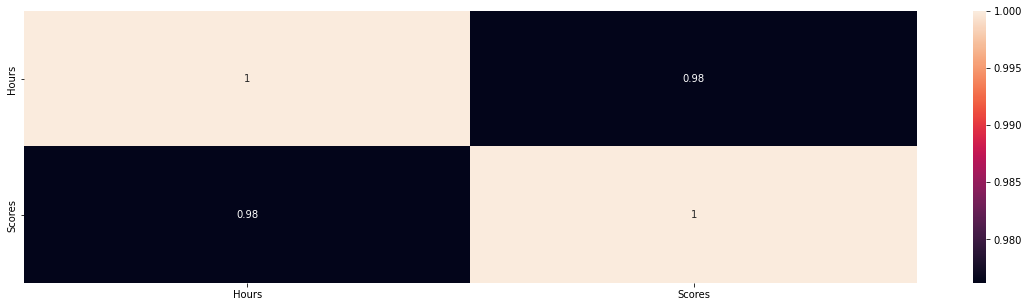

In [ ]:
# Correlation heatmap
plt.figure(figsize= (20, 5))
seaborn.heatmap(correlation, annot= True)
plt.show()

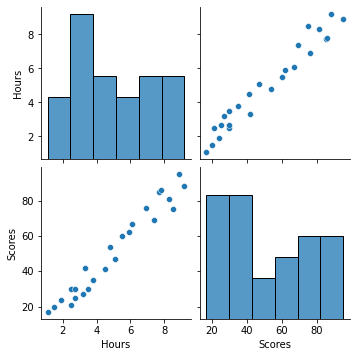

In [ ]:
# Seaborn pairplot
seaborn.pairplot(data)
plt.show()

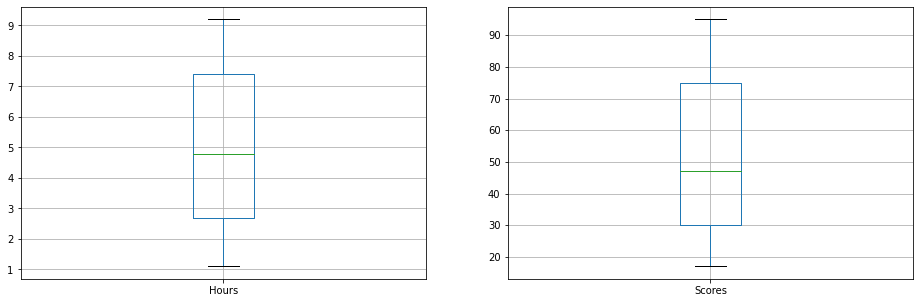

In [ ]:
# Boxplot of dataframe
plt.figure(figsize= (16, 5))
plt.subplot(1, 2, 1)
data.boxplot('Hours')
plt.subplot(1, 2, 2)
data.boxplot('Scores')
plt.show()

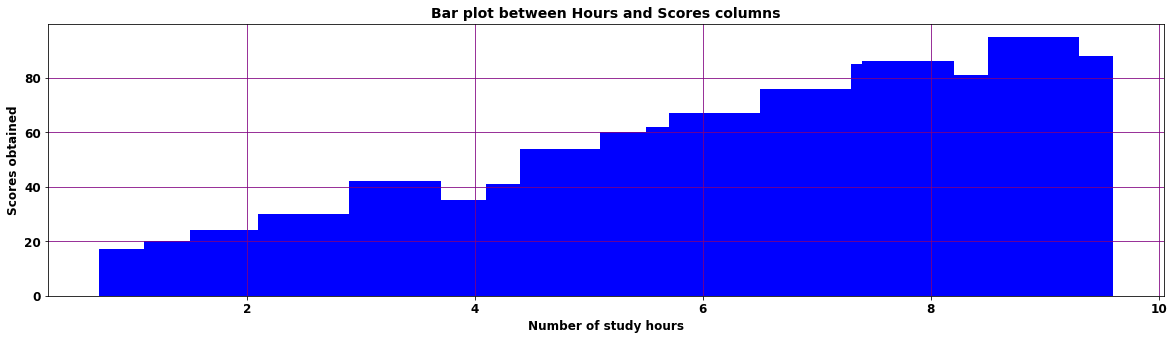

In [ ]:
# Bar plot between Hours and Scores columns
plt.figure(figsize= (20, 5))
plt.bar(data['Hours'], data['Scores'], color= 'blue')
plt.title('Bar plot between Hours and Scores columns', fontsize= 14, fontweight= 'bold')
plt.xlabel('Number of study hours', fontsize= 12, fontweight= 'bold')
plt.ylabel('Scores obtained', fontsize= 12, fontweight= 'bold')
plt.xticks(fontsize= 12, fontweight= 'bold')
plt.yticks(fontsize= 12, fontweight= 'bold')
plt.grid(color= 'purple')
plt.show()

In [ ]:
# Dividing into training and testing sets
x= data[['Hours']]
y= data[['Scores']]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.1, random_state= 42)
print('Independent training set shape is :', x_train.shape)
print('Dependent training set shape is :', y_train.shape)
print('Independent testing set shape is :', x_test.shape)
print('Dependent testing set shape is :', y_test.shape)

Independent training set shape is : (22, 1)
Dependent training set shape is : (22, 1)
Independent testing set shape is : (3, 1)
Dependent testing set shape is : (3, 1)


In [ ]:
# Applying linear regression
lr= LinearRegression()
lr.fit(x_train, y_train)
print('Training accuracy % is :', (r2_score(y_train, lr.predict(x_train)) * 100 ).round(decimals= 3) )
y_pred= lr.predict(x_test)
lr_accuracy_score= r2_score(y_test, y_pred) * 100
print('Testing accuracy % is :', lr_accuracy_score.round(decimals= 3) )
print('Mean absolute error is :', mean_absolute_error(y_test, y_pred).round(decimals= 3) )
print('Mean squared error is :', mean_squared_error(y_test, y_pred).round(decimals= 3) )
print('Root mean squared error is :', numpy.sqrt(mean_squared_error(y_test, y_pred)).round(decimals= 3)  )

Training accuracy % is : 94.876
Testing accuracy % is : 97.405
Mean absolute error is : 3.966
Mean squared error is : 18.115
Root mean squared error is : 4.256


In [ ]:
# Applying Decision Tree Regressor
dtr= DecisionTreeRegressor()
dtr.fit(x_train, y_train)
print('Training accuracy % is :', (r2_score(y_train, dtr.predict(x_train)) * 100 ).round(decimals= 3) )
y_pred= dtr.predict(x_test)
dtr_accuracy_score= r2_score(y_test, y_pred) * 100
print('Testing accuracy % is :', dtr_accuracy_score.round(decimals= 3) )
print('Mean absolute error is :', mean_absolute_error(y_test, y_pred).round(decimals= 3) )
print('Mean squared error is :', mean_squared_error(y_test, y_pred).round(decimals= 3) )
print('Root mean squared error is :', numpy.sqrt(mean_squared_error(y_test, y_pred)).round(decimals= 3)  )

Training accuracy % is : 99.904
Testing accuracy % is : 95.965
Mean absolute error is : 5.0
Mean squared error is : 28.167
Root mean squared error is : 5.307


In [ ]:
#  What will be predicted score if a student studies for 9.25 hours/ day ?
study_hours= [[9.25]]
predicted_score= lr.predict(study_hours)
predicted_score= int(predicted_score)
print('Predicted score is :', predicted_score )

Predicted score is : 93


In [ ]:
print(colored('Thank you for reading this !', 'green', attrs= ['bold']) )

Thank you for reading this !
